<a href="https://colab.research.google.com/github/Mauricio8583/Google-Colab-Files/blob/main/LSTMKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/60
100/100 [==============================] - 9s 22ms/step - loss: 0.0098 - accuracy: 0.0010
Epoch 2/60
100/100 [==============================] - 3s 32ms/step - loss: 0.0018 - accuracy: 0.0013
Epoch 3/60
100/100 [==============================] - 2s 23ms/step - loss: 0.0018 - accuracy: 0.0013
Epoch 4/60
100/100 [==============================] - 2s 23ms/step - loss: 0.0017 - accuracy: 0.0013
Epoch 5/60
100/100 [==============================] - 2s 22ms/step - loss: 0.0017 - accuracy: 0.0013
Epoch 6/60
100/100 [==============================] - 2s 22ms/step - loss: 0.0017 - accuracy: 0.0013
Epoch 7/60
100/100 [==============================] - 3s 30ms/step - loss: 0.0017 - accuracy: 0.0013
Epoch 8/60
100/100 [==============================] - 3s 25ms/step - loss: 0.0017 - accuracy: 0.0013
Epoch 9/60
100/100 [==============================] - 2s 22ms/step - loss: 0.0017 - accuracy: 0.0013
Epoch 10/60
100/100 [==============================] - 2s 22ms/step - loss: 0.0017 - accura

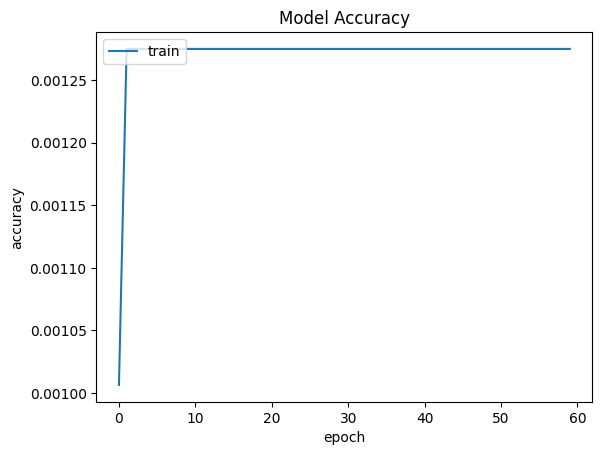

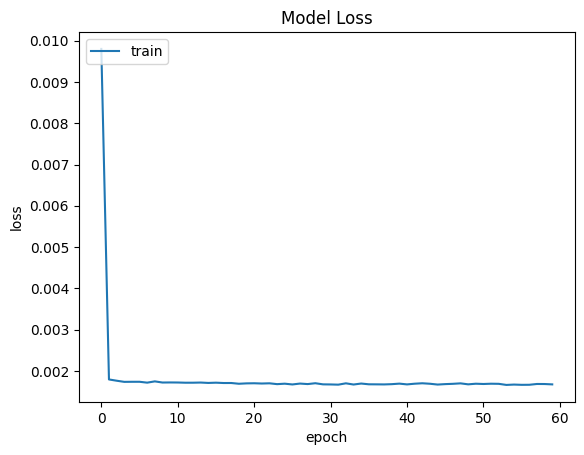

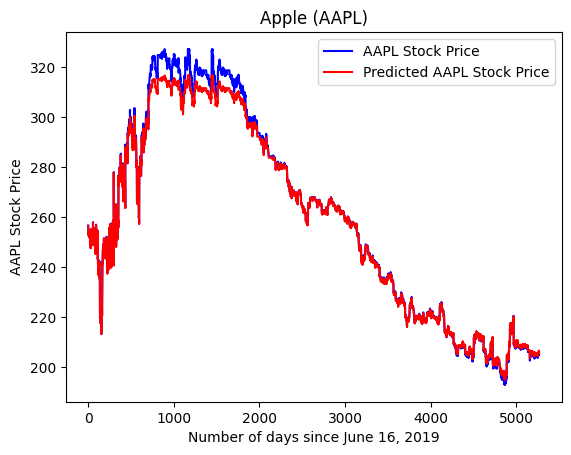

In [5]:
import yfinance as yf
from datetime import datetime
from math import floor
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


#amzn = yf.Ticker('AMZN')
#end_date = datetime.now().strftime('%Y-%m-%d')
#amzn_hist = amzn.history(start='2019-10-07', end=end_date)

hist = pd.read_csv('AAPL_data.csv', usecols=['Open'])

close = hist
amzn_values = close.values
amzn_values = amzn_values.reshape(-1, 1)

trainingScalar = MinMaxScaler(feature_range=(0,1))
amzn_values_scaled = trainingScalar.fit_transform(amzn_values)

training_split = floor(len(amzn_values_scaled) * 0.85)
training_amzn = amzn_values_scaled[0:training_split]
training_ind_amzn = []
training_dep_amzn = []

for i in range(50, len(training_amzn)):
  training_ind_amzn.append(training_amzn[i-50:i][0])
  training_dep_amzn.append(training_amzn[i][0])

training_ind_amzn, training_dep_amzn = np.array(training_ind_amzn), np.array(training_dep_amzn)
training_ind_amzn = np.reshape(training_ind_amzn, (training_ind_amzn.shape[0], training_ind_amzn.shape[1], 1))

amzn_model = Sequential()
amzn_model.add(LSTM(100, return_sequences=True, input_shape=(training_ind_amzn.shape[1], 1)))
amzn_model.add(Dropout(0.2))
amzn_model.add(LSTM(100, return_sequences=True))
amzn_model.add(Dropout(0.2))
amzn_model.add(LSTM(100))
amzn_model.add(Dropout(0.2))
amzn_model.add(Dense(25))
amzn_model.add(Dense(1))
amzn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = amzn_model.fit(training_ind_amzn, training_dep_amzn, epochs=60, batch_size=300)

testing_input_amzn = amzn_values[training_split:]
testing_input_amzn = trainingScalar.fit_transform(testing_input_amzn)
testing_amzn = []

for i in range(50, len(testing_input_amzn) + 50):
  testing_amzn.append(testing_input_amzn[i-50:i][0])
testing_amzn = np.array(testing_amzn)
testing_amzn = np.reshape(testing_amzn, (testing_amzn.shape[0], testing_amzn.shape[1], 1))
predict_amzn = amzn_model.predict(testing_amzn)
predict_amzn = trainingScalar.inverse_transform(predict_amzn)

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(amzn_values[training_split:], color='blue', label='AAPL Stock Price')
plt.plot(predict_amzn, color='red', label='Predicted AAPL Stock Price')
plt.title('Apple (AAPL)')
plt.xlabel('Number of days since June 16, 2019')
plt.ylabel('AAPL Stock Price')
plt.legend()
plt.show()